In [45]:
# Install dependencies
!pip install -q -U pandas plotly nbformat kaleido


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [46]:
# Clone repo to get access to data/ directory
!git clone https://github.com/andreped/breast-cancer-stats.git
%cd breast-cancer-stats/apps/

fatal: destination path 'breast-cancer-stats' already exists and is not an empty directory.
/Users/andreped/workspace/breast-cancer-stats/apps/breast-cancer-stats/apps


Label   0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79    80+
1961   0.00   0.00   0.16    6.3   28.6   53.6   74.7  108.3  159.9
1962   0.00   0.00   0.16    5.4   25.1   53.2   72.7  104.7  160.2
1963   0.00   0.00   0.54    5.8   24.6   52.3   74.6  108.9  164.2
1964   0.00   0.00   0.44    6.9   23.7   53.3   76.3  113.6  146.8
1965   0.00   0.06   0.36    6.1   25.8   54.2   73.5  100.6  145.7
1966   0.00   0.00   0.14    5.8   27.1   60.6   72.8  107.0  130.1
1967   0.06   0.00   0.52    6.4   26.2   55.0   71.5  100.1  126.5
1968   0.00   0.00   0.38    6.3   26.9   56.5   76.0  107.0  150.0
1969   0.00   0.00   0.25    6.2   27.7   60.5   74.8  109.5  148.5
1970   0.00   0.00   0.48    7.4   25.5   60.1   73.1  105.4  157.2
1971   0.00   0.00   0.47    6.5   27.1   56.7   74.3  110.0  161.3
1972   0.00   0.00   0.81    7.8   26.7   60.2   79.9  119.9  154.9
1973   0.00   0.00   0.52    7.4   28.1   56.3   78.0  108.8  142.5
1974   0.00   0.00   0.29    6.9   29.6   58.2  

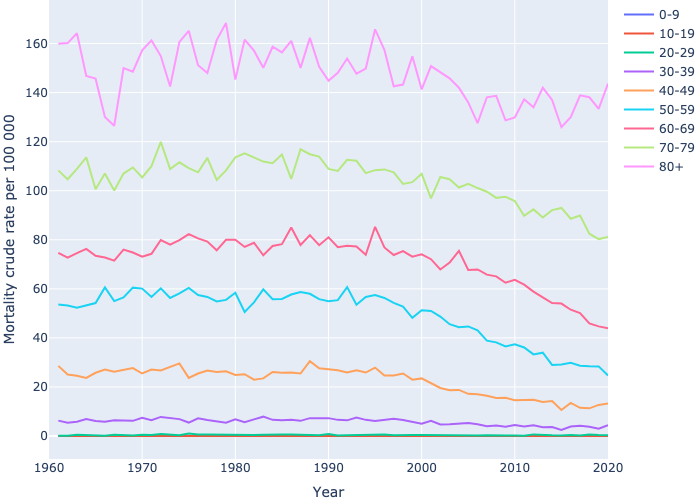

In [47]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import os


# load cancer data
data = pd.read_csv("../data/NCdata-trends-total-pop(578+246+208+352+752)-can(180)-mortality-females-age(0-84)-y(1943-2020).csv", header=0, index_col=0)
data = data.T

print(data)

figures = []
for country in data.columns:
    figures.append(
        go.Scatter(
            name=country,
            x=np.asarray(data.index).astype("int"),
            y=data[country],
            mode='lines',
            showlegend=True,
        )
    )

layout = go.Layout(
    xaxis=dict(
        title="Year",
        tickmode='linear', #change 1
        tick0=1960,#data.index.min(),
        dtick=10,
        tickvals=data.index,
    ),
    yaxis=dict(title="Mortality crude rate per 100 000")
)

fig = go.Figure(figures, layout=layout, layout_xaxis_range=[1960, 2020])
fig.update_layout(
    margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0  #top margin
    )
)

os.makedirs("results/", exist_ok=True)

fig.show(renderer="png")  # renderer="colab")
fig.write_image("results/bc_mortality_over_time_age_groups.png")
